# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе найти месторождения, для каждого определить значения признаков;
- построить модель и оценить объём запасов;
- выбрать месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- рассчитать прибыль как суммарную прибыль отобранных месторождений.

In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

import numpy as np

from numpy.random import RandomState

import pandas as pd

import phik

import seaborn as sb

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
state = RandomState(12345) 

In [4]:
def pred(path):
    try:
        df=pd.read_csv(path)
    except:
        print('Файл недоступен')
    else:
        display(df.head())
    display(df.info())
    print('Количество дубликатов:',df.duplicated().sum())
    display(df.query('id.duplicated(keep=False)').sort_values('id'))
    return df

In [5]:
def suffix(df):
    print("Одной скважине соответствуют разные значения запасов в скважине - Таких записей ",
          df['id'].duplicated(keep=False).sum())
    i=df.query('id.duplicated(keep=False)').index
    df.loc[df['id'].duplicated(),'id']=df.loc[df['id'].duplicated(),'id']\
.agg(lambda x:x.replace(x,x+'_1'))
    display(df.iloc[i].sort_values('id').head())
    return df

In [6]:
def heatmap(df,num):
    df.set_index('id',inplace=True)
    plt.figure(figsize=(6,5))
    sb.heatmap((df.phik_matrix(interval_cols=num))*100,annot=True,fmt='.0f')
    return df

In [7]:
def regression(df):
    X_train,X_test,y_train,y_test=train_test_split(df.drop('product',axis=1),df['product'],
                                               random_state=state)
    model=LinearRegression()
    y_pred=model.fit(X_train,y_train).predict(X_test)
    print('средний запас предсказанного сырья: ',np.median(y_pred).round(0))
    print('RMSE: ', mean_squared_error(y_test,y_pred,squared=False).round(0))
    return model

## Загрузка и подготовка данных

In [8]:
df0=pred('/datasets/geo_data_0.csv')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Одной скважине соответствуют разные значения запасов в скважине. Сами скважины в их уникальности нам не понадобятся. Предположим, что это это две разные скважины с ошибками в названиях - добавлю приписки к названиям.

In [9]:
df0=suffix(df0)

Одной скважине соответствуют разные значения запасов в скважине - Таких записей  20


,id,f0,f1,f2,product
64022,74z30,0.741456,0.459229,5.153109,140.771492
66136,74z30_1,1.084962,-0.312358,6.990771,127.643327
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
51970,A5aEY_1,-0.180335,0.935548,-2.094773,33.020205
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504


In [10]:
df1=pred('/datasets/geo_data_1.csv')

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [11]:
df1=suffix(df1)

Одной скважине соответствуют разные значения запасов в скважине - Таких записей  8


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6_1,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0_1,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147


In [12]:
df2=pred('/datasets/geo_data_2.csv')

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [13]:
df2=suffix(df2)

Одной скважине соответствуют разные значения запасов в скважине - Таких записей  8


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW_1,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo_1,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290


In [14]:
pd.concat([df0['id'],df1['id'],df2['id']]).duplicated().sum()

31

31 название скважины присутствует в разных регионах. Пока не могу сказать, является ли это помехой.

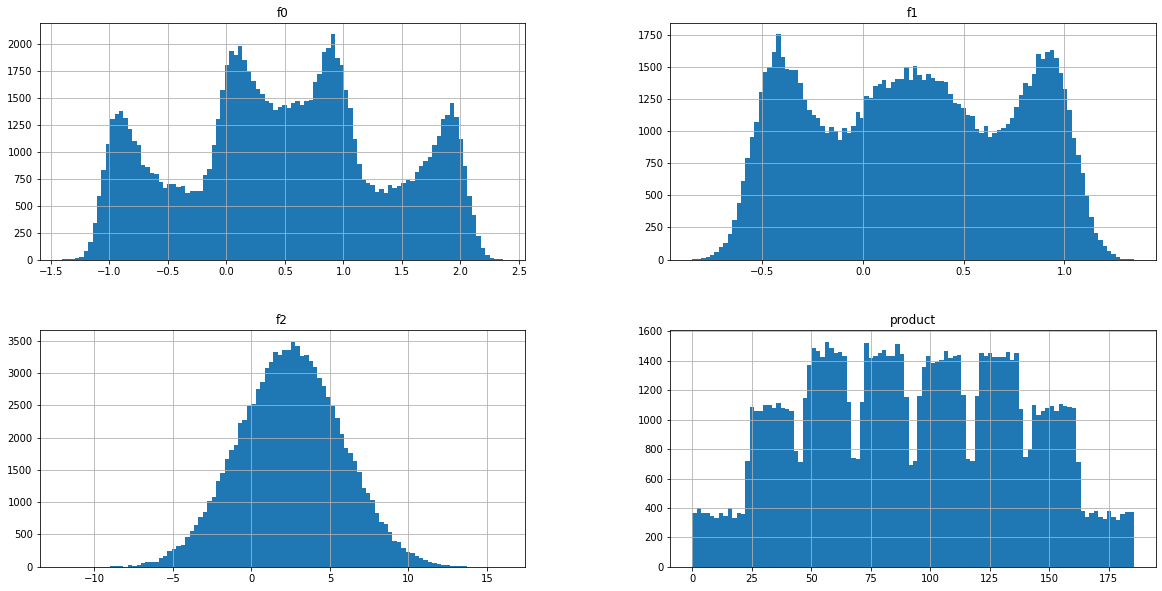

In [15]:
df0.hist(figsize=(20,10),bins=100)
plt.show()

f2 - нормальное распределение,\
f0 распределено вокруг значений -1, 0, 1, 2,\
f1 имеет моды на -0.4, 0.25, 0.9,\
объём запасов имеет нормальное распределение с сегментацией по диапазонам в 15 пунктов.

In [16]:
print('Средний объём запасов по скважинам: ',df0['product'].median().round(0))

Средний объём запасов по скважинам:  92.0


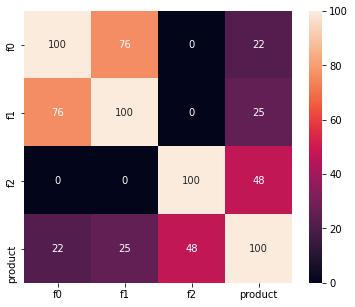

In [17]:
df0=heatmap(df0,df0.columns)

Мультиколлинеарности нет.

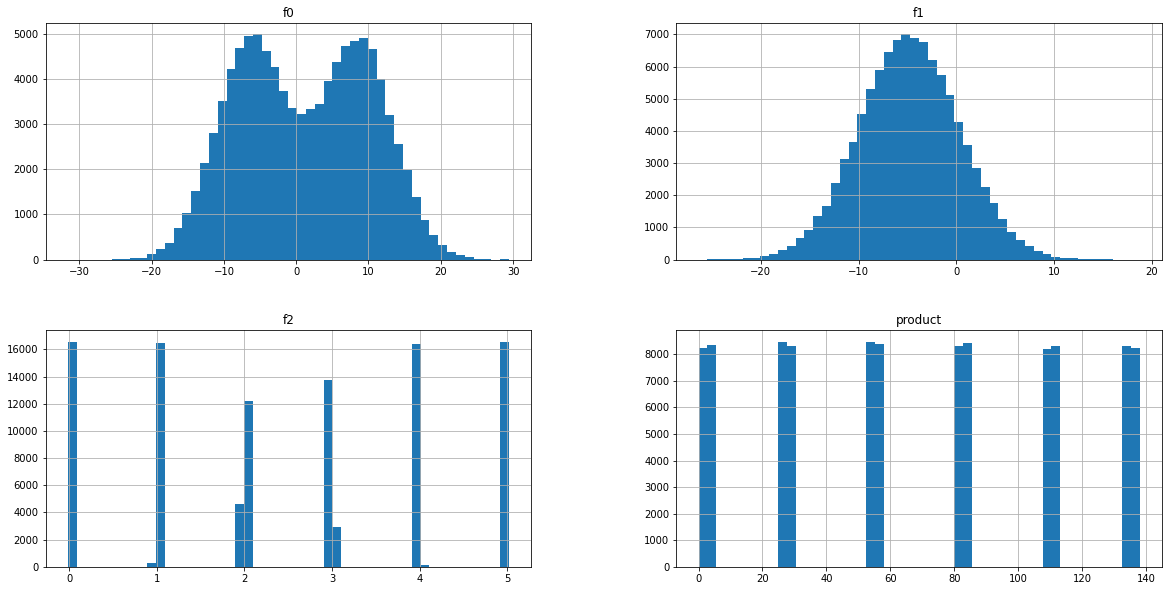

In [18]:
df1.hist(figsize=(20,10),bins=50)
plt.show()

f1 - нормально распределено,\
f0 - бимодальность на -6 и 10,\
f2 принимает значения вокруг целых чисел от 0 до 5,\
объём запасов распределён равномерно и принимает значения вокруг величин в 0, 30, 55, 80, 110 и 135.

In [19]:
print('Средний объём запасов по скважинам: ',df1['product'].median().round(0))

Средний объём запасов по скважинам:  57.0


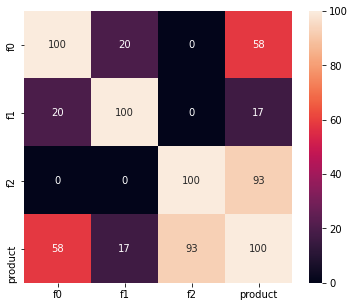

In [20]:
df1=heatmap(df1,['f0', 'f1', 'f2'])

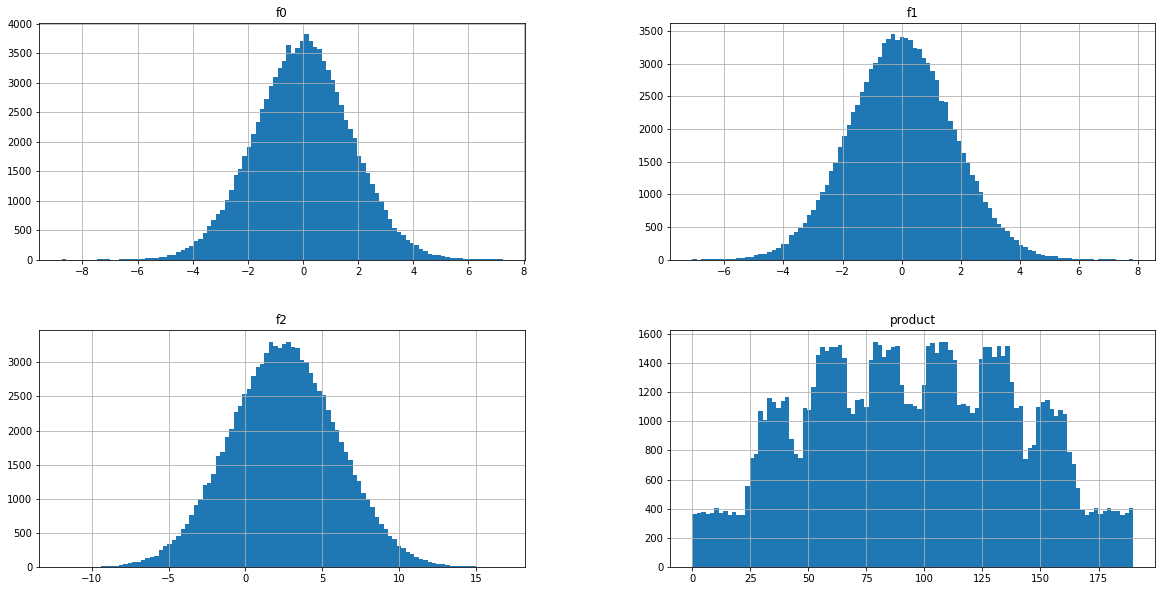

In [21]:
df2.hist(figsize=(20,10),bins=100)
plt.show()

f0, f1, f2  распределены нормально,\
oбъём запасов имеет распределение схожее с первым регионом.

In [22]:
print('Средний объём запасов по скважинам: ',df2['product'].median().round(0))

Средний объём запасов по скважинам:  95.0


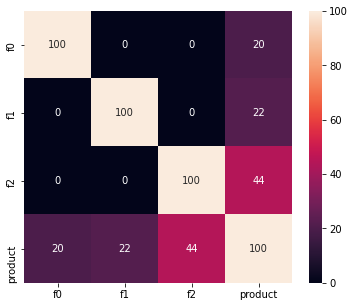

In [23]:
df2=heatmap(df2,df2.columns)

### Вывод

- Одной скважине соответствуют разные значения запасов в скважине - Таких записей 36.
- 31 название скважины присутствует в разных регионах.
- Полных дубликатов и пропусков нет.
- В первом регионе: f2 распределено нормально, f0 распределено вокруг значений -1, 0, 1, 2, f1 имеет моды на -0.4, 0.25, 0.9, объём запасов имеет нормальное распределение с сегментацией по диапазонам в 15 пунктов.
- Во втором регионе: f1 - нормально распределено, f0 - бимодальность на -6 и 10, f2 принимает значения вокруг целых чисел от 0 до 5, объём запасов распределён равномерно и принимает значения вокруг величин в 0, 30, 55, 80, 110 и 135.
- В третьем регионе: f0, f1, f2 распределены нормально, oбъём запасов имеет распределение схожее с первым регионом.
- Средний объём запасов по скважинам в первом регионе - 92, втором - 57, третьем -95.

## Обучение и проверка модели

In [24]:
model0=regression(df0)

средний запас предсказанного сырья:  93.0
RMSE:  38.0


In [25]:
model1=regression(df1)

средний запас предсказанного сырья:  58.0
RMSE:  1.0


In [26]:
model2=regression(df2)

средний запас предсказанного сырья:  95.0
RMSE:  40.0


### Вывод

<div class="alert alert-info">
Худшие показатели среднего запаса у второго региона, но наименьшая величина ошибки. По такой картине нельзя дать точные предсказания, какой регион лучше. Фактичеки средние величины принимают находятся в таких диапазонах: 1 - 55-131, 2 - 57-59, 3 - 55-135.

## Подготовка к расчёту прибыли

In [27]:
quantity=500
best_quantity=200
budget_th=10**7
unit_price=0.45
item_price=450
a=0.025

достаточный объём сырья для безубыточной разработки новой скважины

In [28]:
budget_th/item_price/best_quantity

111.11111111111111

Требуемый объём сырья на скважину больше среднего запаса по скважинам в любом регионе.

In [29]:
(111-95)/111

0.14414414414414414

Для соразмерности выделяемому бюджету нам требуется 200 скважин с запасами не меньше 111 тыс. баррелей.\
Среднее количество запасов в регионах по 100 тыс. скважин меньше этого значения не менее, чем на 14%.

## Расчёт прибыли и рисков 

In [30]:
def income(df,model):
    df['predict']=model.predict(df.drop('product',axis=1))
    return (df.sort_values('predict',ascending=False).reset_index()
            .loc[:best_quantity,'product'].sum()*item_price).round(0)

In [31]:
income_pred=income(df0,model0)
print((income_pred/10**6).round(1),' млрд ', income_pred<budget_th)

13.6  млрд  False


In [32]:
income_pred=income(df1,model1)
print((income_pred/10**6).round(1),' млрд ',  income_pred<budget_th)

12.5  млрд  False


In [33]:
income_pred=income(df2,model2)
print((income_pred/10**6).round(1),' млрд ',  income_pred<budget_th)

12.7  млрд  False


Во всех регионах запасы в предсказанных скважинах окупают затраты. Первый регион имеет лучший показатель.

In [34]:
for df, model,region in [[df0,model0,1],[df1,model1,2],[df2,model2,3]]:
    incomes=[]
    for i in range(1000):
        incomes.append(df.sample(quantity,replace=True,random_state=state)
                       .sort_values('predict',ascending=False).reset_index()
            .loc[:best_quantity,'product'].sum()*item_price-budget_th)
    incomes=pd.Series(incomes)
    print(f'Средняя прибыль по региону {region:<20} {(incomes.median()/10**6).round(2)} млрд ')
    print(f'95%-й доверительный интервал по региону {region}:\
    {(incomes.quantile(.025)/10**6).round(0)} - {(incomes.quantile(.975)/10**6).round(2)} млрд')
    print(f'Риск убытков по региону {region:<20}\
          {(incomes[incomes<0].count()/10).round(1)}%\n')

Средняя прибыль по региону 1                    0.46 млрд 
95%-й доверительный интервал по региону 1:    -0.0 - 0.98 млрд
Риск убытков по региону 1                             4.0%

Средняя прибыль по региону 2                    0.48 млрд 
95%-й доверительный интервал по региону 2:    0.0 - 0.88 млрд
Риск убытков по региону 2                             0.4%

Средняя прибыль по региону 3                    0.41 млрд 
95%-й доверительный интервал по региону 3:    -0.0 - 0.94 млрд
Риск убытков по региону 3                             6.0%



Меньше 2.5% вероятность убытков только во втором регионе. Расчётная прибыль с регионов одинакова.

### Вывод

Рекомендуется к разарботке второй регион. Ожидаемая прибыль - 10-10.9 млрд, риск меньше 0.4%.
    
В id скважин присутствует незначительное число дублей.